# Data Methods for Health Research Assignment

Upload my completed Jupyter Notebook on github

## Installing packages 

Please install the following modules before launching this notebook.

```bash
pip install --upgrade pip
pip install numpy pandas pandasql matplotlib
```

In [1]:
import pip

def install(package):
   pip.main(['install', package])
install("numpy")
install("pandas")
install("pandasql")
install("matplotlib")

In [2]:
#preliminaries
import pandas as pd
import numpy as np

from pandasql import sqldf
from pandasql import PandaSQL

%matplotlib inline
import matplotlib.pyplot as plt

## Importing Data

Please load the following data from URLs.

In [3]:
practices_Dec2015 = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv', header = None)
prescribing_Dec2015 = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv')
number_patient = pd.read_csv('https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age')
postcodes = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv')
deprivation_by_postcode = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv')
NHSOF = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')

## Data Pre-preprocessing

Please check the data integrity.

In [4]:
practices_Dec2015.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [5]:
# label practices_Dec2015 column names
practices_col_names = ['PERIOD', 'PRACTICE', 'NAME', 'TYPE', 'ADDRESS', 'CITY', 'COUNTY', 'POSTCODE', '']
practices_Dec2015.columns = practices_col_names
practices_Dec2015.columns

Index(['PERIOD', 'PRACTICE', 'NAME', 'TYPE', 'ADDRESS', 'CITY', 'COUNTY',
       'POSTCODE', ''],
      dtype='object')

In [6]:
# drop '' column
practices_Dec2015 = practices_Dec2015.drop('', axis = 1)
practices_Dec2015.columns

Index(['PERIOD', 'PRACTICE', 'NAME', 'TYPE', 'ADDRESS', 'CITY', 'COUNTY',
       'POSTCODE'],
      dtype='object')

In [7]:
prescribing_Dec2015.columns

Index([' SHA', 'PCT', 'PRACTICE', 'BNF CODE',
       'BNF NAME                                    ', 'ITEMS  ',
       'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD',
       '                 '],
      dtype='object')

In [8]:
# strip spaces in column names of prescribing_Dec2015
col_names = list(prescribing_Dec2015.columns)
stripped_cols = [x.strip() for x in col_names]
prescribing_Dec2015.columns = stripped_cols
prescribing_Dec2015.columns

Index(['SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS', 'NIC',
       'ACT COST', 'QUANTITY', 'PERIOD', ''],
      dtype='object')

In [9]:
practices_Dec2015.head(1)

,PERIOD,PRACTICE,NAME,TYPE,ADDRESS,CITY,COUNTY,POSTCODE
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU


In [10]:
prescribing_Dec2015.head(1)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,


In [11]:
number_patient.head(1)

,GP_PRACTICE_CODE,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,...,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7


In [12]:
postcodes.head(1)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Middle Super Output Area Code,Middle Super Output Area Name,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804


In [13]:
deprivation_by_postcode.head(1)

,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.5


In [14]:
NHSOF.head(1)

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"


## Assignment A (for the city “Doncaster” only)
The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for the city “Doncaster” only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

## A.1

Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).

In [15]:
# Identify all GP practices in Doncaster
city_doncaster = practices_Dec2015['CITY'].str.strip() == 'DONCASTER'
doncaster = practices_Dec2015[city_doncaster]
doncaster_practice = doncaster['PRACTICE']
    
# Calculate total number of prescriptions and total actual cost for each GP practice
doncaster_prescribing = prescribing_Dec2015[prescribing_Dec2015['PRACTICE'].isin(doncaster_practice)]
grouped = doncaster_prescribing.groupby('PRACTICE')
prescriptions_by_practice = grouped['ITEMS'].sum()
cost_by_practice = grouped['ACT COST'].sum()
by_practice_df = pd.concat([prescriptions_by_practice, cost_by_practice], axis = 1).reset_index()
right_df = practices_Dec2015.loc[:, ['PRACTICE', 'NAME']]
each_practice_df = pd.merge(by_practice_df, right_df, how = 'left')
each_practice_df.head(5)

,PRACTICE,ITEMS,ACT COST,NAME
0,B81043,37042,283037.61,SOUTH AXHOLME PRACTICE
1,C84700,16,74.95,HARWORTH MEDICAL CENTRE
2,C86001,26621,218539.71,CARCROFT DOCTORS GROUP
3,C86002,15620,109546.49,THE RANSOME PRACTICE
4,C86003,22443,177203.69,HATFIELD HEALTH CENTRE


In [16]:
# Calculate total numbdr of prescriptions and total actual cost of all GP practices
total_prescriptions = doncaster_prescribing['ITEMS'].sum()
total_act_cost = doncaster_prescribing['ACT COST'].sum()
overall_dict = {
                'TOTAL DESCRIPTIONS OF ALL GP': total_prescriptions,
                'TOTAL ACT COST OF ALL GP': total_act_cost
                }
overall_df = pd.DataFrame(overall_dict, index = [0])
overall_df

,TOTAL ACT COST OF ALL GP,TOTAL DESCRIPTIONS OF ALL GP
0,4765638.88,585221


## A.2

Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

In [17]:
# Select the top ten most frequently prescribed medications across all practices
top_10_most_fre_med=doncaster_prescribing.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=False).head(10).reset_index()
top_10_most_fre_med

,BNF NAME,ITEMS,ACT COST
0,Lansoprazole_Cap 30mg (E/C Gran),13845,23067.70
1,Paracet_Tab 500mg,11670,41343.26
2,Aspirin Disper_Tab 75mg,11259,9327.89
3,Simvastatin_Tab 40mg,10173,11374.75
4,Salbutamol_Inha 100mcg (200 D) CFF,8839,14288.41
5,Lansoprazole_Cap 15mg (E/C Gran),7949,10031.79
6,Ramipril_Cap 10mg,7827,10309.68
7,Bendroflumethiazide_Tab 2.5mg,7676,6655.90
8,Atorvastatin_Tab 20mg,7544,10604.91
9,Co-Codamol_Tab 30mg/500mg,7500,43988.55


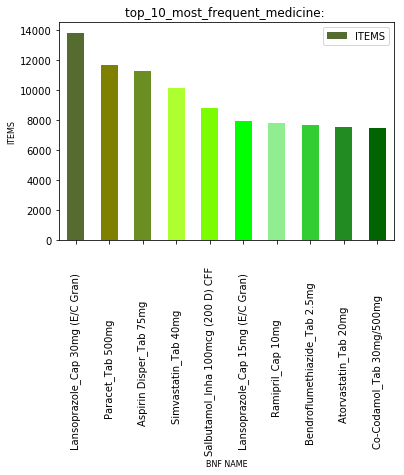

In [18]:
%matplotlib inline

ax=top_10_most_fre_med[['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', color=['darkolivegreen','olive', 'olivedrab', 'greenyellow', 'lawngreen', 'lime', 'lightgreen', 'limegreen', 'forestgreen', 'darkgreen'],title='top_10_most_frequent_medicine: ', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("BNF NAME",fontsize=8)

ax.set_ylabel("ITEMS",fontsize=8)

In [19]:
# Select the top ten least frequently prescribed medications across all practices
top_10_least_fre_med=doncaster_prescribing.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=False).tail(10).reset_index()
top_10_least_fre_med

,BNF NAME,ITEMS,ACT COST
0,Rochester_Pop-On Slc Self-Adh Sheath 29m,1,44.16
1,Hollister VaPro Plus Male 40cm 12-14ml (,1,166.92
2,Rochester_Freedom Sheath Sml 23mm,1,46.87
3,Rochester_Freedom Sheath Med 28mm,1,140.62
4,Rochester_Freedom Plus Sheath Med 28mm,1,46.88
5,Rochester_Freedom Plus Sheath Lge 35mm,1,46.87
6,Hollister_Adapt Belt 58-109cm,1,14.50
7,Hollister_Adapt Lubri Deod Liq,1,8.68
8,Hollister_Adapt Stoma Pdr,1,2.40
9,kliniderm superabsorbent 10cm x 15cm Pfa,1,8.94


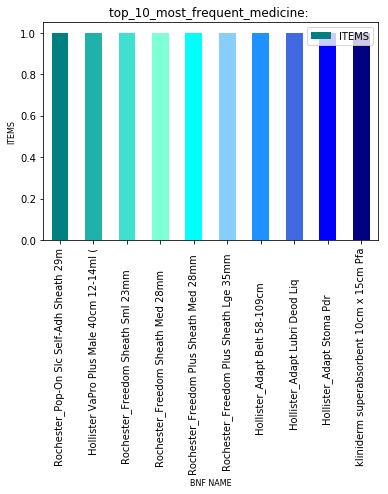

In [20]:
%matplotlib inline

ax=top_10_least_fre_med[['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', color=['teal', 'lightseagreen', 'turquoise', 'aquamarine', 'aqua', 'lightskyblue', 'dodgerblue', 'royalblue', 'blue', 'navy'],title='top_10_most_frequent_medicine: ', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("BNF NAME",fontsize=8)

ax.set_ylabel("ITEMS",fontsize=8)

In [21]:
# Calculate total actual cost of top ten most/least frequently prescribed medications across all practices and comparison
top_10_most_cost = top_10_most_fre_med['ACT COST'].sum()
top_10_least_cost = top_10_least_fre_med['ACT COST'].sum()
ttl_act_cost = doncaster_prescribing['ACT COST'].sum()
practice_df = pd.DataFrame(each_practice_df)
practice_df['TOP 10 MOST ACT COST'] = top_10_most_cost
practice_df['TOP 10 LEAST ACT COST'] = top_10_least_cost
practice_df['CITY ACT COST'] = ttl_act_cost
practice_df.head(5)

,PRACTICE,ITEMS,ACT COST,NAME,TOP 10 MOST ACT COST,TOP 10 LEAST ACT COST,CITY ACT COST
0,B81043,37042,283037.61,SOUTH AXHOLME PRACTICE,180992.84,526.84,4765638.88
1,C84700,16,74.95,HARWORTH MEDICAL CENTRE,180992.84,526.84,4765638.88
2,C86001,26621,218539.71,CARCROFT DOCTORS GROUP,180992.84,526.84,4765638.88
3,C86002,15620,109546.49,THE RANSOME PRACTICE,180992.84,526.84,4765638.88
4,C86003,22443,177203.69,HATFIELD HEALTH CENTRE,180992.84,526.84,4765638.88


## A.3

Find the top ten most expensive medications and calculate their total actual cost.

In [22]:
# Find the top ten most expensive medications
doncaster_prescribing['costs_per_drug'] = doncaster_prescribing['ACT COST'] / doncaster_prescribing['ITEMS']
drug_sorted = doncaster_prescribing.sort_values('costs_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
top_10_most_exp_drug = drug_sorted.head(10)
top_10_most_exp_drug

C:\Users\BB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,,costs_per_drug
2339017,Q50,03K,B81043,0607030M0AAAAAA,Metyrapone_Cap 250mg,2,3636.60,3362.60,1000,201512,,1681.30
2531182,Q51,02X,C86022,0605010S0BEAEBA,Norditropin SimpleXx_Inj 30u 10mg/1.5ml,1,1701.60,1573.39,8,201512,,1573.39
2509141,Q51,02X,C86007,0501040U0AAAGAG,Tobramycin_Neb Soln 300mg/5ml Amp,1,1305.92,1207.53,56,201512,,1207.53
2500885,Q51,02X,C86001,0411000F0AAADAD,Galantamine_Oral Soln 20mg/5ml S/F,1,1300.00,1202.06,200,201512,,1202.06
2554868,Q51,02X,C86613,0605010S0BEAEBA,Norditropin SimpleXx_Inj 30u 10mg/1.5ml,1,1276.20,1180.05,6,201512,,1180.05
2554948,Q51,02X,C86613,090401000BBMWA0,PKU cooler 20_Liq (4 Flav),1,1082.40,1087.35,20880,201512,,1087.35
2507658,Q51,02X,C86006,090401000BBKXA0,PKU express 15 Powder_PdrSach25g(Orange),1,989.10,914.58,3750,201512,,914.58
2563355,Q51,02X,Y04018,20031700206,Aquacel Ag+ Extra 20cm x 30cm Wound Dres,2,1953.90,1806.70,90,201512,,903.35
2339210,Q50,03K,B81043,090401000BBRLA0,PKU Lophlex LQ_10 Liq (Juicy Berries),1,932.40,862.15,11250,201512,,862.15
2514373,Q51,02X,C86012,0605010S0BCAGBS,Saizen_Inj 20mg/2.5ml Cart,1,927.20,857.35,2,201512,,857.35


In [23]:
# Calculate total actual cost of top ten most expensive medications
total_actual_cost = sum(top_10_most_exp_drug['costs_per_drug'])
total_actual_cost

11469.110000000001

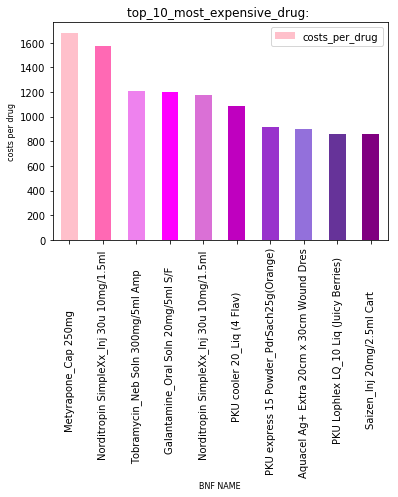

In [24]:
%matplotlib inline

ax=top_10_most_exp_drug[['BNF NAME','costs_per_drug']].plot(kind='bar', x='BNF NAME', y='costs_per_drug', color=['pink', 'hotpink','violet', 'magenta', 'orchid', 'm', 'darkorchid', 'mediumpurple', 'rebeccapurple', 'purple'],title='top_10_most_expensive_drug: ', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("BNF NAME",fontsize=8)

ax.set_ylabel("costs per drug",fontsize=8)

## A.4

How does prescribing (frequency and costs) in the city “Doncaster” compares when using prescribing data from Cambridge as a reference?

In [25]:
# Select prescribing (frequency and costs) in the city “Doncaster”
city_doncaster = practices_Dec2015['CITY'].str.strip() == 'DONCASTER'
doncaster = practices_Dec2015[city_doncaster]
doncaster_practice = doncaster['PRACTICE']
doncaster_prescribing = prescribing_Dec2015[prescribing_Dec2015['PRACTICE'].isin(doncaster_practice)]
doncaster_freq = doncaster_prescribing['ITEMS'].sum()
doncaster_cost = doncaster_prescribing['ACT COST'].sum()
    
# Select prescribing (frequency and costs) in the city “Cambridge”
city_cambridge = practices_Dec2015['CITY'].str.strip() == 'CAMBRIDGE'
cambridge = practices_Dec2015[city_cambridge]
cambridge_practice = cambridge['PRACTICE']
cambridge_prescribing = prescribing_Dec2015[prescribing_Dec2015['PRACTICE'].isin(cambridge_practice)]
cambridge_freq = cambridge_prescribing['ITEMS'].sum()
cambridge_cost = cambridge_prescribing['ACT COST'].sum()
    
# Compare “Doncaster” and “Cambridge”
freq_ref = doncaster_freq / cambridge_freq
cost_ref = doncaster_cost / cambridge_cost
    
compare_dict = {
        'CITY': ['Doncaster', 'Cambridge'],
        'PRESCRIBING FREQUENCY': [doncaster_freq, cambridge_freq],
        'PRESCRIBING COST': [doncaster_cost, cambridge_cost]
}
compare_df = pd.DataFrame(compare_dict)
compare_df

,CITY,PRESCRIBING COST,PRESCRIBING FREQUENCY
0,Doncaster,4765638.88,585221
1,Cambridge,2607317.49,345193


In [26]:
print("Doncaster was around {:.1f} to {:.1f} times comparing to Cambridge with regard to cost and prescribing frequency.".format(cost_ref, freq_ref))

Doncaster was around 1.8 to 1.7 times comparing to Cambridge with regard to cost and prescribing frequency.


## A.5

Pandas dataframes can also be queried using SLQL! Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

In [27]:
# GP practices per city
query_str = """
SELECT CITY,
    COUNT(*) AS NUMBER_OF_GP
    FROM practices_Dec2015
    GROUP BY CITY
    ORDER BY NUMBER_OF_GP desc;
"""
answer = sqldf(query_str, globals())
answer.head(5) 

,CITY,NUMBER_OF_GP
0,,339
1,BIRMINGHAM,173
2,LIVERPOOL,137
3,LEEDS,122
4,MANCHESTER,117


In [28]:
print("There was 45 GP practices in Doncaster.")

There was 45 GP practices in Doncaster.


## Assignment B(entire dataset)

Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

## B.1

Calculate the monthly total spending for each GP-practice.

In [29]:
def answer_B1():
    grouped = prescribing_Dec2015.groupby('PRACTICE')
    gp_month_spend = grouped['ACT COST'].sum()
    return gp_month_spend

answer_B1().head(5)

PRACTICE
A81001     83220.57
A81002    333514.67
A81003     47977.16
A81004    147494.85
A81005    107669.51
Name: ACT COST, dtype: float64

## B.2

Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

In [30]:
grouped = prescribing_Dec2015.groupby('PRACTICE')
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
act_cost = answer_B1()
act_cost_df = pd.DataFrame(act_cost).reset_index()
relative_cost = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
relative_cost['COSTS PER PATIENT'] = relative_cost['ACT COST'] / relative_cost['Total_All']
relative_cost_gp =  relative_cost.loc[:, ['PRACTICE', 'COSTS PER PATIENT']]
relative_cost_gp.head(5)

,PRACTICE,COSTS PER PATIENT
0,A81001,19.655307
1,A81002,16.937417
2,A81003,14.291677
3,A81004,16.117894
4,A81005,13.658443


## B.3

Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for the city “Doncaster” within the national scatterplot.
*Practices from Doncaster are marked with red stars.

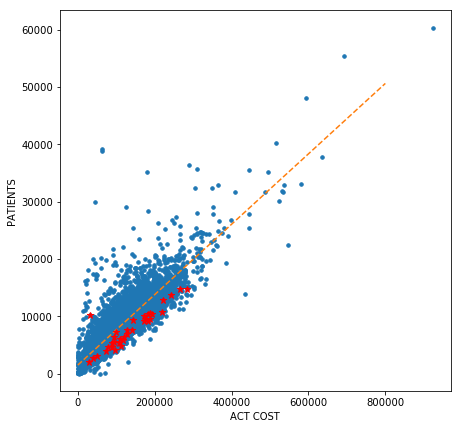

In [31]:
# Calculate monthly total spending per registered patients for national GP-practices
grouped = prescribing_Dec2015.groupby('PRACTICE')
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
act_cost = answer_B1()
act_cost_df = pd.DataFrame(act_cost).reset_index()
relative_cost = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
relative_cost = relative_cost.rename(index = str, columns = {"Total_All": "PATIENTS"})
relative_cost['COSTS PER PATIENT'] = relative_cost['ACT COST'] / relative_cost['PATIENTS']

# Calculate monthly total spending per registered patients for doncaster GP-practices
city_doncaster = practices_Dec2015['CITY'].str.strip() == 'DONCASTER'
doncaster = practices_Dec2015[city_doncaster]
doncaster_practice = doncaster['PRACTICE'].values
relative_cost_doncaster = relative_cost[relative_cost['PRACTICE'].isin(doncaster_practice)]
x_d = relative_cost_doncaster['ACT COST'].values
y_d = relative_cost_doncaster['PATIENTS'].values

# fit with polyfit
x = relative_cost['ACT COST'].values
y = relative_cost['PATIENTS'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.figure(figsize=(7,7))
xp = np.linspace(0, 800000, 1000)
_ = plt.plot(x, y, '.', xp, p(xp), '--', markersize = 7)
plt.plot(x_d, y_d, '*', markersize = 7, c = 'red')
plt.xlabel("ACT COST")
plt.ylabel("PATIENTS")
plt.show()

## B.4

Visualize the relative costs per patient of all national GP-practices in a histogram.

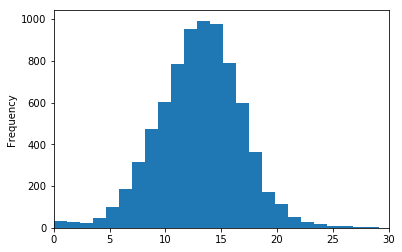

In [32]:
grouped = prescribing_Dec2015.groupby('PRACTICE')
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
act_cost = answer_B1()
act_cost_df = pd.DataFrame(act_cost).reset_index()
relative_cost = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
relative_cost = relative_cost.rename(index = str, columns = {"Total_All": "PATIENTS"})
relative_cost['COSTS PER PATIENT'] = relative_cost['ACT COST'] / relative_cost['PATIENTS']
relative_cost['COSTS PER PATIENT'].plot.hist(bins = 50000, xlim = [0, 30])
plt.show()

## B.5

Use descriptive statistics to show how the city “Doncaster” compares to the national level.

In [33]:
city_doncaster = practices_Dec2015['CITY'].str.strip() == 'DONCASTER'
doncaster = practices_Dec2015[city_doncaster]
doncaster_practice = doncaster['PRACTICE']

grouped = prescribing_Dec2015.groupby('PRACTICE')
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
act_cost = answer_B1()
act_cost_df = pd.DataFrame(act_cost).reset_index()

relative_cost = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
relative_cost = relative_cost.rename(index = str, columns = {"Total_All": "PATIENTS"})
relative_cost['COSTS PER PATIENT'] = relative_cost['ACT COST'] / relative_cost['PATIENTS']
relative_cost = relative_cost.reset_index()
relative_cost_doncaster = relative_cost[relative_cost['PRACTICE'].isin(doncaster_practice)]
relative_cost_nation = relative_cost[~relative_cost['PRACTICE'].isin(practices_Dec2015)]

comparison = relative_cost_doncaster.describe(), relative_cost_nation.describe()   
comparison

(            ACT COST      PATIENTS  COSTS PER PATIENT
 count      34.000000     34.000000          34.000000
 mean   136924.987941   7793.676471          17.605743
 std     65441.431049   3382.505793           3.342864
 min     28141.890000   2027.000000           3.201279
 25%     93224.152500   5279.250000          16.890849
 50%    124224.800000   7411.000000          18.025493
 75%    183392.382500  10215.000000          19.157827
 max    283037.610000  14739.000000          23.269407,
             ACT COST      PATIENTS  COSTS PER PATIENT
 count    7701.000000   7701.000000        7701.000000
 mean    97573.645499   7471.459031          21.317316
 std     65787.154710   4607.808820         665.570655
 min         2.410000      1.000000           0.001872
 25%     47714.240000   4037.000000          10.689451
 50%     84448.530000   6646.000000          13.212266
 75%    133552.730000  10000.000000          15.504289
 max    923786.260000  60352.000000       58319.780000)

In [34]:
print("The relative cost per patient in Doncaster was £17.6, and the national level was £21.3. Therefor, the relative cost per patient in Doncaster was about £3 lower than the national level. ")

The relative cost per patient in Doncaster was £17.6, and the national level was £21.3. Therefor, the relative cost per patient in Doncaster was about £3 lower than the national level. 


## Assignment C(entire dataset)

Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

## C.1

Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin).

In [35]:
# Select statin prescriptions of simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin
simvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Simvastatin')
atorvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Atorvastatin')
rosuvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Rosuvastatin')
pravastatin = prescribing_Dec2015['BNF NAME'].str.contains('Pravastatin')
fluvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Fluvastatin')
statins_prescription = simvastatin | atorvastatin | rosuvastatin | pravastatin | fluvastatin
    
# Calculate relative costs per patient for five statin prescriptions
prescribing_Dec2015_statin = prescribing_Dec2015[statins_prescription]
grouped = prescribing_Dec2015_statin.groupby('PRACTICE')
act_cost = grouped['ACT COST'].sum()
act_cost_df = pd.DataFrame(act_cost).reset_index()
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
relative_cost = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
relative_cost = relative_cost.rename(index = str, columns = {"Total_All": "PATIENTS"})
relative_cost['COSTS PER PATIENT'] = relative_cost['ACT COST'] / relative_cost['PATIENTS']
relative_cost = relative_cost.reset_index()
relative_cost_statin = relative_cost.loc[:, ['PRACTICE', 'COSTS PER PATIENT']]
relative_cost_statin.head(5)

,PRACTICE,COSTS PER PATIENT
0,A81001,0.429098
1,A81002,0.330786
2,A81003,0.258680
3,A81004,0.233264
4,A81005,0.239390


## C.2

Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in the city “Doncaster”.

In [36]:
city_doncaster = practices_Dec2015['CITY'].str.strip() == 'DONCASTER'
doncaster = practices_Dec2015[city_doncaster]
merged_df = pd.merge(doncaster, deprivation_by_postcode, how = 'left', left_on='POSTCODE', right_on='Postcode')
ans_df = merged_df.loc[:, ['PRACTICE', 'Index of Multiple Deprivation Rank', 'Index of Multiple Deprivation Decile']]
association = ans_df.drop_duplicates().reset_index(drop = True)
association.head(5)

,PRACTICE,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,B81043,28287.0,9.0
1,C86001,1978.0,1.0
2,C86002,2104.0,1.0
3,C86003,4020.0,2.0
4,C86005,4461.0,2.0


## C.3

Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. (Use descriptive statistics) 

In [37]:
# Select statin prescriptions of simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin
simvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Simvastatin')
atorvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Atorvastatin')
rosuvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Rosuvastatin')
pravastatin = prescribing_Dec2015['BNF NAME'].str.contains('Pravastatin')
fluvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Fluvastatin')
statins_prescription = simvastatin | atorvastatin | rosuvastatin | pravastatin | fluvastatin
    
# Identify the lowest/highest relative spenders of five statins from the first/last decile
prescribing_Dec2015_statin = prescribing_Dec2015[statins_prescription]
grouped = prescribing_Dec2015_statin.groupby('PRACTICE')
act_cost = grouped['ACT COST'].sum()
act_cost_df = pd.DataFrame(act_cost).reset_index()
patients = number_patient.loc[:, ['GP_PRACTICE_CODE', 'Total_All']]
res = pd.merge(act_cost_df, patients, left_on = 'PRACTICE', right_on = 'GP_PRACTICE_CODE', how = 'inner')
res = res.rename(index = str, columns = {"Total_All": "PATIENTS"})
res['COSTS PER PATIENT'] = res['ACT COST'] / res['PATIENTS']
res = res.reset_index()
practice_postcode = practices_Dec2015.loc[:, ['PRACTICE', 'POSTCODE']].drop_duplicates()
merged_df = pd.merge(res, practice_postcode, how = 'left')
merged_df['POSTCODE'] = merged_df['POSTCODE'].str.strip()
quantile_1, quantile_10 = merged_df['ACT COST'].quantile([0.1, 0.9])
lowest = merged_df[merged_df['ACT COST'] <= quantile_1]
highest = merged_df[merged_df['ACT COST'] >= quantile_10]

# Estemiate an association of IMD and the lowest/highest groups
deprivation_by_postcode['Postcode'] = deprivation_by_postcode['Postcode'].str.strip()
right_df = deprivation_by_postcode.loc[:, ['Postcode', 'Index of Multiple Deprivation Rank', 'Index of Multiple Deprivation Decile']].drop_duplicates()
lowest = pd.merge(lowest, right_df, how = 'left', left_on = 'POSTCODE', right_on = 'Postcode')
highest = pd.merge(highest, right_df, how = 'left', left_on = 'POSTCODE', right_on = 'Postcode')
right_df = practices_Dec2015.loc[:, ['PRACTICE', 'NAME']]
lowest = pd.merge(lowest, right_df, how = 'left')
highest = pd.merge(highest, right_df, how = 'left')
lowest_ttl_rank = lowest['Index of Multiple Deprivation Rank'].sum()
highest_ttl_rank = highest['Index of Multiple Deprivation Rank'].sum()
lowest_rank_describe = lowest['Index of Multiple Deprivation Rank'].describe()
highest_rank_describe = highest['Index of Multiple Deprivation Rank'].describe()

difference = lowest_ttl_rank, highest_ttl_rank, lowest_rank_describe, highest_rank_describe
difference

(8460907.0, 12178099.0, count      767.000000
 mean     11031.169492
 std       8755.328066
 min         27.000000
 25%       3735.000000
 50%       8764.000000
 75%      17416.000000
 max      32327.000000
 Name: Index of Multiple Deprivation Rank, dtype: float64, count      768.000000
 mean     15856.899740
 std       9263.586417
 min         81.000000
 25%       8453.250000
 50%      15363.000000
 75%      23731.250000
 max      32796.000000
 Name: Index of Multiple Deprivation Rank, dtype: float64)

In [38]:
print("The IMD of the lowest group was 11031.2 and the highest was 15856.9. The difference was about 4825.7 between these two groups.")

The IMD of the lowest group was 11031.2 and the highest was 15856.9. The difference was about 4825.7 between these two groups.


## C.4

Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [39]:
# Estimate an association of CVD mortality rate and GP-practices in nine English regions
nhsof_2015 = NHSOF[(NHSOF['Breakdown']=='Region') & (NHSOF['Year'] == 2015) & (NHSOF['Gender'] == 'Person')]
numerator = nhsof_2015['Numerator'].str.replace(",", "").astype('float', copy=False)
denominator = nhsof_2015['Denominator'].str.replace(",", "").astype('float', copy=False)
nhsof_2015 = nhsof_2015.assign(MortalityRate = numerator / denominator)
postcodes_df = postcodes.loc[:, ['Postcode 1', 'Region Name']]
practices_Dec2015['POSTCODE'] = practices_Dec2015['POSTCODE'].str.strip()
merged_df = pd.merge(practices_Dec2015, postcodes_df, how = 'inner', left_on = 'POSTCODE', right_on = 'Postcode 1')
ans_df = pd.merge(merged_df, nhsof_2015, how = 'left', left_on = 'Region Name', right_on = 'Level description')
mortality_CVD = ans_df.loc[:, ['PRACTICE', 'NAME', 'Region Name', 'MortalityRate']]
mortality_CVD.head(5)

,PRACTICE,NAME,Region Name,MortalityRate
0,A81004,WOODLANDS ROAD SURGERY,North East,0.000834
1,A81008,ALBERT HOUSE CLINIC,North East,0.000834
2,A81021,NORMANBY MEDICAL CENTRE,North East,0.000834
3,A81065,THE ESTON SURGERY,North East,0.000834
4,Y02499,ESTON GRANGE NHS HEALTH CARE CENTRE,North East,0.000834


In [40]:
# Estimate an association of CVD mortality rate and nine English regions
nhsof_2015 = NHSOF[(NHSOF['Breakdown']=='Region') & (NHSOF['Year'] == 2015) & (NHSOF['Gender'] == 'Person')]
numerator = nhsof_2015.loc[:, 'Numerator'].str.replace(",", "").astype('float', copy=False)
denominator = nhsof_2015.loc[:, 'Denominator'].str.replace(",", "").astype('float', copy=False)
nhsof_2015['Mortality Rate'] = numerator / denominator
mortality_region = nhsof_2015.loc[:, ['Level description', 'Mortality Rate']].reset_index(drop = True)
mortality_region

C:\Users\BB\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Level description,Mortality Rate
0,East Midlands,0.000739
1,East of England,0.000632
2,London,0.000492
3,North East,0.000834
4,North West,0.000821
5,South East,0.000571
6,South West,0.000672
7,West Midlands,0.000717
8,Yorkshire and The Humber,0.000762


## C.5

Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases

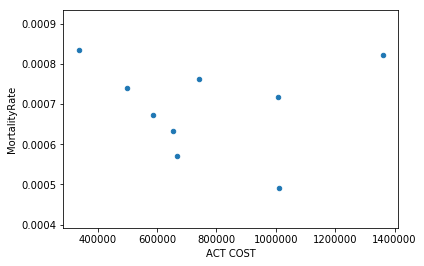

In [41]:
# Select statin prescriptions of simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin
simvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Simvastatin')
atorvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Atorvastatin')
rosuvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Rosuvastatin')
pravastatin = prescribing_Dec2015['BNF NAME'].str.contains('Pravastatin')
fluvastatin = prescribing_Dec2015['BNF NAME'].str.contains('Fluvastatin')
statins_prescription = simvastatin | atorvastatin | rosuvastatin | pravastatin | fluvastatin
    
# Estimate a correlation of CVD mortality rate and relative spending for five statin prescriptions in each regions
prescribing_Dec2015_statin = prescribing_Dec2015[statins_prescription]
practices_Dec2015['POSTCODE'] = practices_Dec2015['POSTCODE'].str.strip()
right_df = practices_Dec2015.loc[:, ['PRACTICE', 'POSTCODE']]
merged_df = pd.merge(prescribing_Dec2015_statin, right_df, how = 'left')
right_df = postcodes.loc[:, ['Postcode 1', 'Region Name']]
merged_df = pd.merge(merged_df, right_df, how = 'left', left_on = 'POSTCODE', right_on = 'Postcode 1')
grouped = merged_df.groupby('Region Name')
region_spending = grouped['ACT COST'].sum()
region_spending = pd.DataFrame(region_spending).reset_index()
nhsof_2015 = NHSOF[(NHSOF['Breakdown']=='Region') & (NHSOF['Year'] == 2015) & (NHSOF['Gender'] == 'Person')]
numerator = nhsof_2015['Numerator'].str.replace(",", "").astype('float', copy=False)
denominator = nhsof_2015['Denominator'].str.replace(",", "").astype('float', copy=False)
nhsof_2015 = nhsof_2015.assign(MortalityRate = numerator / denominator)
region_mortality_rate = nhsof_2015
merged_df = pd.merge(region_spending, region_mortality_rate, left_on = 'Region Name', right_on = 'Level description')
    
# plt
y_max = merged_df['MortalityRate'].max()
y_min = merged_df['MortalityRate'].min()
merged_df.plot.scatter(x = 'ACT COST', y = 'MortalityRate', ylim = (y_min - 0.0001, y_max + 0.0001))
plt.show()

## Assignment D
Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere.

## D1
Provide a visualisation of the seasonal patterns across all years.

In [42]:
# The fle trend of Spain
url_es = 'https://www.google.org/flutrends/about/data/flu/es/data.txt'

SpainFluTrends = pd.read_csv(url_es, sep=',', header=8)
SpainFluTrends['Date'] = pd.to_datetime(SpainFluTrends['Date'])

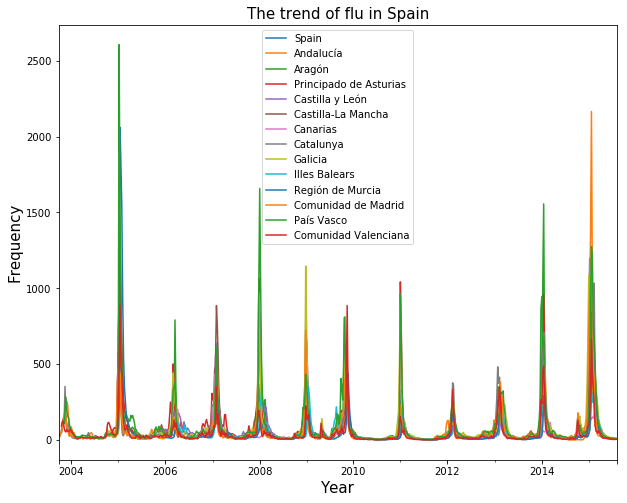

In [43]:
# The fle trend of Spain
%matplotlib inline

fig_es = SpainFluTrends.plot(x='Date', figsize=(10,8))
fig_es.set_title('The trend of flu in Spain',fontsize=15)
fig_es.set_ylabel('Frequency',fontsize=15)
fig_es.set_xlabel('Year',fontsize=15)

In [44]:
# The fle trend of Brazil
url_br = 'https://www.google.org/flutrends/about/data/flu/br/data.txt'

BrazilFluTrends = pd.read_csv(url_br, sep=',', header = 8)
BrazilFluTrends['Date'] = pd.to_datetime(BrazilFluTrends['Date'])

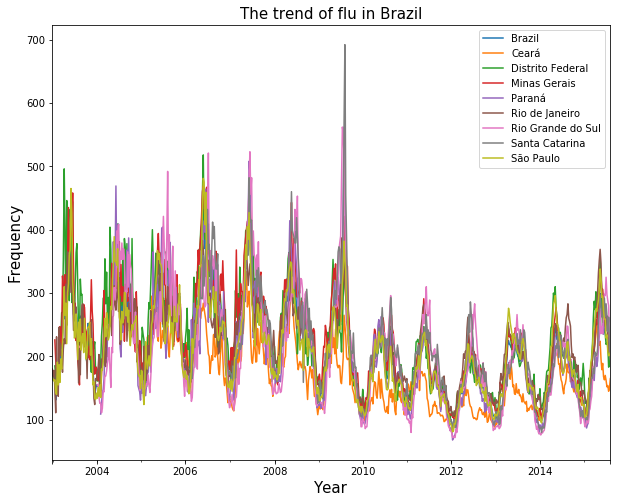

In [45]:
# The fle trend of Brazil
%matplotlib inline

fig_br = BrazilFluTrends.plot(x='Date', figsize=(10,8))
fig_br.set_title('The trend of flu in Brazil',fontsize=15)
fig_br.set_ylabel('Frequency',fontsize=15)
fig_br.set_xlabel('Year',fontsize=15)

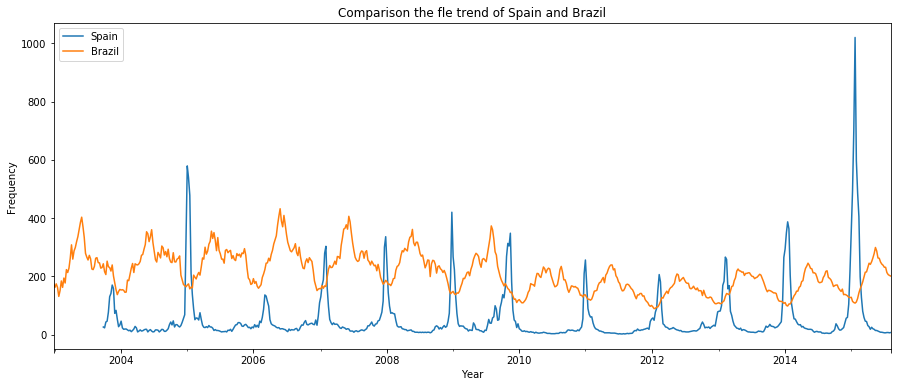

In [46]:
# Comparison of the fle trend of Spain and Brazil
%matplotlib inline

ax = SpainFluTrends.plot(legend ='left', x='Date', y = 'Spain', figsize=(15, 6), grid=True)
BrazilFluTrends.plot(x='Date', y = 'Brazil' , ax=ax)

plt.title("Comparison the fle trend of Spain and Brazil")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

## D2
Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [47]:
# Calculate yearly minimum and maximum of Spain
SpainFluTrends = pd.read_csv(url_es, sep=',', header=8)
SpainFluTrends['Year'] = pd.to_datetime(SpainFluTrends['Date']).dt.year
SpainFluTrendsyear_df = SpainFluTrends.groupby('Year')
SpainFluTrendsyear_df = SpainFluTrendsyear_df.agg({'Spain':[np.min, np.max, np.mean]})
SpainFluTrendsyear_df

Spain                  
      amin  amax        mean
Year                        
2003    23   170   77.357143
2004     9   326   27.634615
2005     9   579   63.038462
2006    10   136   38.886792
2007     8   336   62.423077
2008     6   420   42.480769
2009     8   348   77.134615
2010     3   209   13.980769
2011     2   256   23.538462
2012     9   206   36.566038
2013     7   266   53.250000
2014     4   387   57.884615
2015     6  1020  151.968750

In [48]:
# Calculate yearly minimum and maximum of Brazil
BrazilFluTrends = pd.read_csv(url_br, sep=',', header = 8)
BrazilFluTrends['Year'] = pd.to_datetime(BrazilFluTrends['Date']).dt.year
BrazilFluTrendsyear_df = BrazilFluTrends.groupby(['Year'])
BrazilFluTrendsyear_df = BrazilFluTrendsyear_df.agg({'Brazil':[np.min, np.max, np.mean]})
BrazilFluTrendsyear_df

Brazil                 
       amin amax        mean
Year                        
2002    174  174  174.000000
2003    131  403  238.192308
2004    145  360  249.307692
2005    157  355  254.730769
2006    151  432  263.471698
2007    157  406  256.461538
2008    140  361  243.019231
2009    110  373  211.230769
2010    109  234  172.500000
2011     97  239  160.480769
2012     89  208  145.000000
2013    106  225  166.846154
2014     98  245  170.288462
2015    108  299  206.343750

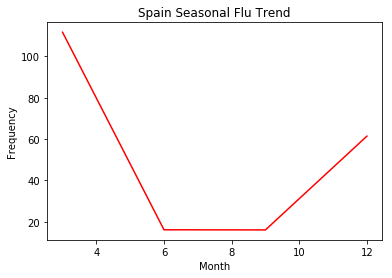

In [49]:
SpainFluTrends = pd.read_csv(url_es, sep=',', header=8)
SpainFluTrends['Month'] = pd.to_datetime(SpainFluTrends['Date']).dt.month
SpainFluTrendsyear_df = SpainFluTrends.groupby('Month')
SpainFluTrendsyear_df = SpainFluTrendsyear_df.agg({'Spain':[np.mean]})

spring = SpainFluTrendsyear_df[0:3]
sp = np.mean(spring)
summer = SpainFluTrendsyear_df[3:6]
su = np.mean(summer)
autumn = SpainFluTrendsyear_df[6:9]
au = np.mean(autumn)
winter = SpainFluTrendsyear_df[9:12]
wi = np.mean(winter)
xpt1 = [3,6,9,12]
ypt1 = [sp,su,au,wi]
plt.plot(xpt1, ypt1, color='red')
plt.title("Spain Seasonal Flu Trend")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

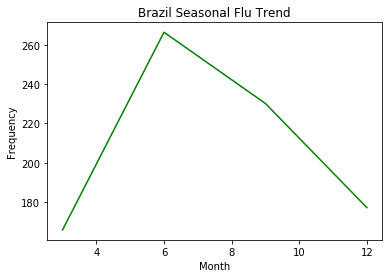

In [50]:
BrazilFluTrends = pd.read_csv(url_br, sep=',', header = 8)
BrazilFluTrends['Month'] = pd.to_datetime(BrazilFluTrends['Date']).dt.month
BrazilFluTrendsyear_df = BrazilFluTrends.groupby(['Month'])
BrazilFluTrendsyear_df = BrazilFluTrendsyear_df.agg({'Brazil':[np.mean]})

spring = BrazilFluTrendsyear_df[0:3]
sp = np.mean(spring)
summer = BrazilFluTrendsyear_df[3:6]
su = np.mean(summer)
autumn = BrazilFluTrendsyear_df[6:9]
au = np.mean(autumn)
winter = BrazilFluTrendsyear_df[9:12]
wi = np.mean(winter)
xpt2 = [3,6,9,12]
ypt2 = [sp,su,au,wi]
plt.plot(xpt2, ypt2, color='green')
plt.title("Brazil Seasonal Flu Trend")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

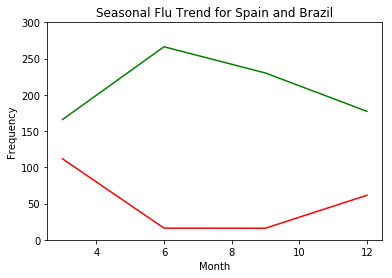

In [51]:
#Cmparison of Spain and Brazil
plt.xlim(3,6,9,12)
plt.ylim(0, 300)
plt.plot(xpt1, ypt1, color='red')
plt.plot(xpt2, ypt2, color='green')
plt.title("Seasonal Flu Trend for Spain and Brazil")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()
#plt.legend()

C:\Users\BB\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


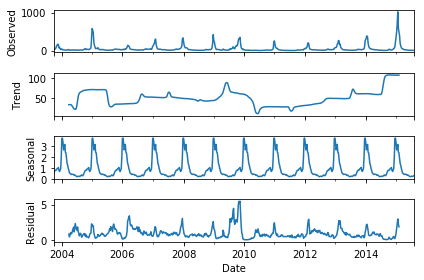

In [52]:
# Spain seasonal flu trend
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Series.from_csv(url_es, header=8)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

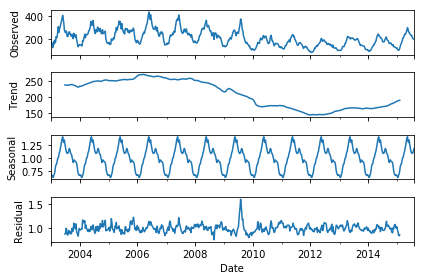

In [53]:
# Brazil seasonal flu trend
series = Series.from_csv(url_br, header = 8)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()